# DECSKS-18: 1D1V two species Vlasov-Poisson boundary problems part 2

In this notebook we continue DECSKS-18 part 1, where we added perfect asborber boundaries. This notebook adds functionality so that the charge reaching any wall can be accumulated which is used to compute self-consistent potentials on any such wall. We continue the same numbering, hence we begin with objective 3.

# Objective 3: self-consistent calculation of potentials on walls

We move onto including functionality permitting boundary conditions on the potential to be calculated as (see ) on a wall at a location $x = x_w$ as:

$$\partial_x\phi (t, x_w) = -\frac{1}{2}\sigma (t, x_w), \qquad \text{self-consistent boundary condition}$$

Note, in our units we have normalized by several quantities, including the permittivity. We require adding up the charge from all left-going fluxes (negative velocities) that reach the wall at $x = x_w$. In a fully six-dimensional phase space, we can compute the charge density as (momentarily, we return to SI units in favor of our normalized units since this is less esoteric)

\begin{eqnarray*}
\sigma (t, \vec{x} = x_w\hat{n}) & = & \int_0^t dt' \int_{\hat{\Omega}\cdot \hat{n} < 0} dv \vec{v}\cdot\hat{n} \int d^2v_{\perp} (q_if_i (t', x_w\hat{n}, \vec{v}) - q_ef_e (t', x_w\hat{n}, \vec{v}) )
\end{eqnarray*}

We see consistency with units:

\begin{eqnarray*}
\underbrace{\sigma (t, \vec{x} = x_w\hat{n})}_{\mathrm{[C / m^2]}} & = & \underbrace{\int_0^t dt'}_{\mathrm{[s]}} \underbrace{\int_{-\infty}^0 dv v}_{\mathrm{[m/s]^2}} \underbrace{\int d^2v_{\perp}}_{\mathrm{[m/s]^2}}\underbrace{(f_i (t', x_w\hat{n}, \vec{v}) - f_e (t', x_w\hat{n}, \vec{v})}_{\mathrm{[1 / (m^3 \cdot (m/s)^3]}} \\
\mathrm{\left[\frac{C}{m^2}\right]} & = & \mathrm{[s]}\cdot\mathrm{[m/s]^2}\cdot\mathrm{[m/s]^2}\cdot\mathrm{\left[\frac{1}{m^3 \cdot (m / s)^3}\right]} = \mathrm{[C / m^2]}  \\
\end{eqnarray*}

In our 1D1V model, we evolve the distribution function integrated over all other dimensions:

$$f(t,x, v_x) = \int d^2\vec{x} \int d^2\vec{v} f(t,\vec{x}, \vec{v}) = \mathrm{[m^2]}\cdot\mathrm{[m/s]^2} \mathrm{\left[\frac{1}{m^3\cdot (m/s)^3}\right]} = \mathrm{\left[\frac{1}{m \cdot (m/s)}\right]}$$

Our normalized units are:

$$f(t,x, v_x) = \mathrm{\left[\frac{1}{(multiples \,\,of\, \,\lambda_D) \cdot (multiples\,\, of\,\, v_{Te})}\right]}$$

and our charge "density" is the total charge accumulated at a point that is also normalized (i.e. $\sigma = \mathrm{[charge] / [electron \,\,charge \,\,in \,\,C] = [number \,\,of \,\,charge \,\,carriers]}$). Where the latter interpretation is valid for only singly charged ion species plasmas.

<b>Suppose $x = x_w$ marks a "left" wall</b> in our 1D1V framework. The charge density accumulated at this point is given by:

$$\sigma (t, x = x_w) = \int_0^t dt' \int_{-\infty}^0 dv_x v_x\left(q_if_i(t', x_w, v_x) - q_ef_e(t', x_{w}, v_x)\right)$$

Returning to our normalized units have $q_e = -1$, $q_i = +1$) we would have

$$\boxed{\sigma (t, x = x_w) = \int_0^t dt' \int_{-\infty}^0 dv_x v_x\left(f_i(t', x_w, v_x) - f_e(t', x_{w}, v_x)\right)}, \qquad \text{1D1V charge density at left wall}$$

Which clearly has units of charge and is the appropriate translation to our lower dimensional case.

A natural discretization of the above is (for brevity we write $v \equiv v_x$) the computation of the successive scalars:

$$\sigma (t^k, x_w) = \sum_{v_j\colon v_j < 0 } \Delta v \, v_{j} (f_i(t^k, x_w, v_j) - f_e(t^k, x_w, v_j))$$

$$\sigma (t^n, x_w) = \sum_{k = 0}^n \Delta t \, \sigma (t^k, x_w), \qquad \text{where } t^n \geq t^k$$

where $\underline{f_{e,i}}(t^k, x_w, \underline{v}) = 1\times 1\times N_v$

We can reduce the notation here by defining a phase space flux $\Gamma$. We define this in lieu of the physical flux $\Gamma = nv = \mathrm{[m^{-2} \cdot s^{-1}]}$ in six-dimensional phase space. In 1D1V, a flux has units of $\Gamma = nv = \mathrm{[s^{-1}]}$ given our area is reduced to a zero-dimensional point. That is, recall; $f(t,x, v_x) = \int d^2\vec{x} \int d^2\vec{v} f(t,\vec{x}, \vec{v}) = \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]}$, we define $n = \int dv_x f(t, x, v_x) = \mathrm{[m/s]}\cdot \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]} =  \mathrm{[m^{-1}]}$, so that the density is a linear density. Then the flux in 1D1V would be $\Gamma = nv = \mathrm{[m^{-1}][m / s]}  = \mathrm{[s^{-1}]}$. The quantity $vf = \mathrm{[m/s]}\cdot \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]} = \mathrm{[m^{-1}]}$ is a flux normalized by the velocity $vf \sim v \frac{n}{v} = \frac{\Gamma}{v}$. Hence, we refer to these as normalized fluxes, where the normalization is understood as by velocity. Thus, we can rewrite the above as

$$\boxed{\sigma (t, x = x_w) = \int_0^t dt' \int_{-\infty}^0 dv_x\left(\Gamma^-_{w,i}(t
,v_x) - \Gamma_{w,e}(t',v_x)\right) \qquad \text{where } \Gamma_{w,(e/i)(t', v_x)} = v_x f_{e/i}(t', x_w, v_x)} \qquad \text{1D1V charge density at left wall}$$

Where the subscript $w$ refers to the wall and so on.

In discrete terms, we write

$$\sigma (t^k, x_w) = \sum_{v_j\colon v_j < 0 } \Delta v \, (\Gamma^-_{w,i}(t^k, v_j) - \Gamma^-_{w,e}(t^k v_j))$$

$$\sigma (t^n, x_w) = \sum_{k = 0}^n \Delta t \, \sigma (t^k, x_w), \qquad \text{where } t^n \geq t^k$$

In practice, it is an unneeded operation to do exactly as written above. That is, the above suggests we first remap all such density packets from time $t^{k-1}$ in $f_{e,i}$ from all $x_i \neq x_w$ that reach the boundary to a postpoint corresponding to the wall $x_i = x_w$ at time $t^k$, and storing each prepoint velocity $v_j$ along with a pointer (or affiliation) from each density mapped to the wall to its corresponding prepoint velocity. To compute the above charge density we can then pursue the above summation directly. The sticking point is to devise an efficient means of storing and accessing all absorbed particle densities remapped to the wall and somehow distinguishing which velocity they came in with. After the above summation is executed to obtain the value of <code>sigma</code> we would discard (absorbing condition) those densities from the current density function anyway as their physics has been recorded (charge collection at the wall), and we do not consider re-emission at this juncture (note, as a first glance it seems equivalent and more manageable not to track absorbed particles, discern a residence time on the wall, then desorb them after such a time, but rather to collect all particles that hit the wall and encode a means that reads this total number and desorbs populations of particles according to a measure of the expectation value for residency and release them at zero velocity. That is, the identity of the particles is not important to the absorption-desorption implementation. Anyway, we digress...). 

While the above stepthrough seems natural, it is more laborious than needed.  That is, we would require an implementation such as:

<table>
<tr><td>Charged wall implementation: method 1</td></tr>
<tr><td><ol>
<li> Construct the 1D flux vector whose $j$th entry corresponds to the total density hitting the wall with velocity $v_j$ at during the interval $t\in [t^{n-1}, t^n]$:

$$\underline{\Gamma}_{w, e/i}(t^n, v_j) = \sum_{\ell = 0}^{N_x^w} v_j f(t^{n-1}, x_{\ell}, v_j), \qquad \underline{\Gamma}_{w,e/i}(v_j) = N_v^w \times 1, \quad N_v^w \leq N_v, N_x^w \leq N_x$$

Where $\ell$ denotes the membership to prepoints $\{i\}$ that are predicted to make contact with the wall according to their equipped velocity $v_j$. That is

$$\ell\in\left\{i\colon\underline{\underline{f_{e,i}}}(t^{k-1}, x_i, v_j) \text{ for all } (i,j)\colon i \mapsto i + \bigl\lfloor\frac{v_j\Delta t}{\Delta x}\bigr\rfloor \leq 0\right\}$$

And the total number of such prepoints that hits the wall is denoted by $N_x^w$ with total number of unique velocities $N_v^w$. <b>this is an expensive step</b> given the conditional checks and most of all because the summation must be encoded manually since only some entries are summed over, thus we cannot exploit fast matrix addition routines which act over all entries (e.g. numpy.sum). 

<li> Compute the charge density accumulated over this interval:

$$\sigma (t^n, x_w) = \pm \sum_{j} \Delta v \Gamma^-_{w,e/i}(t^n, v_j)$$

<li> Increment the cumulative charge density:
$${}$$
$$\sigma (t\in [0,t^n], x_w)\, +\hspace{-.4em}= \sigma (t^n, x_w)$$
<li>Recompute after next pass through.
</ol>
</td></tr>

An obvious improvement to the above is to evade the conditional summation by locally storing a matrix of whose only nonzero entries are those to be summed over, then <code>numpy.sum</code> can be used to efficiently add all such entries. Further, we can deal directly with the density at time $t^{n-1}$, and to use the absorbing boundary condition routine already programmed in order to compatibilize the density for subsequent remapping for all non-collected charges that remain in the density. Thus, we implement the following:

<table>
<tr><td>
Charged wall implementation: method 2
</td></tr>
<tr><td>
<ol>
<li>Tag all particles in $\underline{\underline{f_{e,i}}}(t^{n-1}, x_i, v_j)$ for all $(i,j)\colon i \mapsto \ell = i + \bigl\lfloor\frac{v_j\Delta t}{\Delta x}\bigr\rfloor \leq 0$ and relocate them to new identically-dimensioned object $f_{e/i, absorbed}$ where all other entries are zero. That is, 

$$(f_{e/i, absorbed})_{ij} = \begin{cases}(f_{e/i})_{ij} & \text{if } i = \ell \\
0 & \text{else} \end{cases}$$

<li>Produce a 2D object of flux contributions from each $i$ (here, many entries can be zero producing zero contribution): 

$$\underline{\underline{\Gamma}}_{w,e/i} = \underline{\underline{v_x}}\cdot\underline{\underline{f}}_{e/i,absorbed}, \qquad \underline{\underline{v_x}} = \underline{\underline{v_x}}_{N_x\times N_v}$$

<li> The total charge density is the sum along both axis weighted with the appropriate sign for electrons or ions and the width $\Delta v$ for the required integration along $v$:

$$\sigma (t^n, x_w) = \pm \sum_{i = 0}^{N_x}\sum_{j = 0}^{N_v} \Delta v [\Gamma_{w,e/i}]_{ij}$$

<li> Compute the charge density accumulated over this interval:

$$\sigma (t^n, x_w) = \pm \sum_{j = 0}^{N_v} \Delta v \Gamma_{w,e/i}(t^n, v_j)$$

<li> Increment the cumulative charge density:
$${}$$
$$\sigma (t\in [0,t^n], x_w)\, +\hspace{-.3em}= \sigma (t^n, x_w)$$

<li> Zero out entries in $\underline{\underline{f}}_{e/i}(t^{n-1})$ by absorbing boundary condition

<li>Recompute after next pass through.
</td></tr></table>


Here, we also do not need to fuss with terms like $N_x^w$ and so on since the length of all employed arrays are static. While the above implemenation is more steps, it exploits matrix operations and the underlying numpy routines to avoid slow conditional summations. <b>Thus, we implement method 2</b>.

#### Pseudocode for lower boundary implementation

    f_abs = np.where(z.postpointmesh <= 0, f_old, 0)
    sigma_n = np.sum(v.prepointmesh * f_abs * v.width) # np.sum without axis specification sums over all axes
    sim_params['sigma'] += sigma_n
    f = absorbing_lower_boundary(f, *args)
    
    return f, sim_params['sigma']

The above cumulative charge density object can be stored in one 2D object, and we may sum up along the zero axis at each time step for all time steps previous, but this is also unneeded expense. Instead, we note that all that is needed here is the current charge density total. To that end, a charge density <code>sigma_n</code> at time <code>t.stepnumbers[n]</code> where <code>sigma_n.shape = (x.N,)</code> the total can be stored in <code>sigma += sigma_n</code> or <code>sigma -= sigma_n</code> depending on if we are adding contributions from <code>fi</code> or <code>fe</code>, respectivel where <code>sigma_n</code> is locally computed at each step, and <code>sigma</code> is an array avaiable at a higher scope (e.g. we can choose to store this as <code>sim_params['sigma']</code> in the dictionary <code>sim_params</code> by including additional setup in <code>lib.read</code> that is sensitive to the values of <code>sim_params['BC']['x']['left']</code> and <code>sim_params['BC']['x']['right']</code>. Should these boundary conditions be specified <code>etc/params.dat</code> as <code>self-consistent</code> then a global array <code>sim_params['sigma']['left']</code> or <code>sim_params['sigma']['right']</code> is initialized to an empty array of size <code>(x.N,)</code>, otherwise <code>None</code>. Thus, we require checking any such boundary (lower or upper) that has its <code>sim_params['BC']['x']</code> indicated as <code>self-consistent</code>. For example, a naive implementation (pseudo-code) at the lower boundary would be:

#### pseudocode

In [ ]:
# pseudocode

def charge_collection_lower_boundary(vz, z, f_old, sim_params):
    
    sigma = 0
    for i in range(z.N):
        for j in range(vz.N):
            if zpostpointmesh[i,j] <= 0:
               sigma += vzprepointmesh[i,j]*f_old * vz.width

    if ions:
        sim_params['sigma_total'] += sigma
    elif electrons
        sim_params['sigma_total'] -= sigma

    return sim_params['sigma_total']

We end up using the following implementation, where an argument (int) charge = 1 or -1 is passed through from the initial method call and directly assigns the correct sign of contribution to the total charge density based on whether we are evolving fe or fi without needing any conditional checks. That is, in <code>lib.split.scheme</code> we have calls like:

                fe[n,:,:] = DECSKS.lib.convect.scheme(
                        fe[n,:,:],
                        n,
                        sim_params,
                        z = x,
                        vz = vx,
                        charge = -1)
                fi[n,:,:] = DECSKS.lib.convect.scheme(
                        fi[n,:,:],
                        n,
                        sim_params,
                        z = x,
                        vz = vx,
                        charge = 1)


In [ ]:
def charge_collection_lower_boundary(f_old, Uf, zpostpointmesh, z, vz, sim_params, charge):

    # this discriminates vx vs. x, as the boundary condition function handle
    # sim_params['BC'][z.str]['lower' or 'upper'] is never set to 'charge_collection'
    # in lib.read
    f_absorbed = np.where(z.postpointmesh <= 0, f_old, 0)
    sigma_n = np.sum(vz.prepointmesh * f_absorbed * vz.width)

    # passed by reference, original value is modified, no need for explicit return
    sim_params['sigma'][z.str]['lower'] = \
      sim_params['sigma'][z.str]['lower'] + charge*sigma_n

    f_old, Uf = absorbing_lower_boundary(f_old, Uf, zpostpointmesh, z, vz, sim_params, charge)

    return f_old, Uf

def charge_collection_upper_boundary(f_old, Uf, zpostpointmesh, z, vz, sim_params, charge):

    # this discriminates vx vs. x, as the boundary condition function handle
    # sim_params['BC'][z.str]['lower' or 'upper'] is never set to 'charge_collection'
    # in lib.read
    f_absorbed = np.where(z.postpointmesh <= 0, f_old, 0)
    sigma_n = np.sum(vz.prepointmesh * f_absorbed * vz.width)

    # passed by reference, no need for explicit return
    sim_params['sigma'][z.str]['upper'] = \
      sim_params['sigma'][z.str]['upper'] + charge*sigma_n

    f_old, Uf = absorbing_upper_boundary(f_old, Uf, zpostpointmesh, z, vz, sim_params, charge)

    return f_old, Uf


Note that above we have collected the charge at such walls in objects <code>sigma</code>, and afterwards we absorb those particles, zeroing them out from the system as they have been collected and are not in the domain thenceforth.

Additionally, in <code>lib.read</code> we exploit the key/value pairs already assigned in the boundary conditions :(BC) dictionary, <code>sim_params['BC'][z.str]['type'] = 'peroidic' or 'nonperiodic'</code> and in the event that we wish to have self-consistent calculations on phi, the charge collection routine is triggered on such a boundary by reading in conditionally if phi boundary has "self-consistent" specified by the user in <code>etc/params.dat</code> then <code>sim_params['BC'][z.str]['lower' or 'upper']</code> is set to <code>'charge_collection</code>...

in <code>lib.read</code>

    sigma = {}
    sigma['x'] = {}
    if BC['x']['phi']['lower'] == 'self-consistent':
        sigma['x']['lower'] = 0    # initialize to zero charge at time zero
        BC['x']['lower'] = 'charge_collection'
    if BC['x']['phi']['upper'] == 'self-consistent':
        sigma['x']['upper'] = 0    # initialize to zero charge at time zero
        BC['x']['upper'] = 'charge_collection'


and the relevant boundary condition function handle is assembled in <code>lib.boundaryconditions.nonperiodic</code>

    # lower boundary
    f_old, Uf = eval(sim_params['BC'][z.str]['lower'] +
                           '_lower_boundary')(f_old, Uf,
                                              z.postpointmesh[k,:,:], z, vz,
                                              sim_params, charge)

    # upper boundary
    f_old, Uf = eval(sim_params['BC'][z.str]['upper'] +
                           '_upper_boundary')(f_old, Uf,
                                              z.postpointmesh[k,:,:], z, vz,
                                              sim_params, charge)
    

meanwhile, the orchestrator <code>lib.boundaryconditions.periodic</code> vs. <code>lib.boundaryconditions.nonperiodic</code> is called from dictionary access, which was constructed 

in <code>lib.read</code>

    boundarycondition_function_handle_prefix = 'DECSKS.lib.boundaryconditions'

    # create a dictionary for every phase space variable simulated
    boundarycondition_function_handle = {}

    for var in phasespace_vars:
        boundarycondition_function_handle[var] = ".".join(
            (boundarycondition_function_handle_prefix, BC[var]['type']))
            
       

Finally, to self-consistently compute the potential we add a conditional statement to the dirichlet poisson solver in <code>lib.fieldsolvers</code>

In [ ]:
# unchanged

def compute_electric_field_fd_dirichlet(fe, fi, x, vx, n, sim_params):

    phi = Poisson_DBC_1D1V_2S(fe, fi, x, vx, n, sim_params)

    # currently the finite difference weight matrix W_dn1 is a 6th order LTE to
    # match the 6th order LTE on the Poisson solve
    dphi = 1 / x.width ** 1 * sim_params['W_dn1_LTE6'].dot(phi)
    Ex = -dphi

    return Ex


# lines pertaining to sigma added below

def Poisson_DBC_1D1V_2S(fe, fi,
                x, vx, n,
                sim_params):
    """6th order LTE finite difference Poisson solver for Dirichlet BCs

    see notebook DECSKS-04 for details on construction

    https://github.com/dsirajud/IPython-notebooks/blob/master/
    DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver/
    DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver.ipynb

    The signature 2S = "two species"

    inputs:
    fe -- (ndarray, dim=2) electron density fe(x,v,n) at time step t^n
                          used to compute ne(x,n) at time step t^n
    fi -- (ndarray, dim=2) ion density fe(x,v,n) at time step t^n
                          used to compute ni(x,n) at time step t^n
    x -- (instance) spatial variable
    v -- (instance) velocity variable
    n -- (int) time step number, t^n


    outputs:
    phi -- (ndarray,dim=2) scalar potential, phi(x,v) = phi(x) at time t^n,
           for i = 0, 1, ... , x.N - 1, one full period
    """
    fe = DECSKS.lib.domain.extract_active_grid(fe[n,:,:], x, sim_params)
    fi = DECSKS.lib.domain.extract_active_grid(fi[n,:,:], x, sim_params)

    # Poisson eq. has -(charge density) = ne - ni
    n_total = single_integration(fe - fi, of = x, wrt = vx)

    # form the tensor objects involved in the numerical solution
    #
    #     d^2 phi = n --> D*phi = b
    #
    # where     b = x.width ** 2 * B*n + phi_BC

    # boundary conditions: dirichlet

    phi_DBC = np.zeros(x.N)

    if sim_params['BC']['x']['phi']['lower'] == 'self-consistent':
        phi_DBC[0] = -1/2. * sim_params['sigma']['x']['lower']
    else:
        phi_DBC[0] = sim_params['BC']['x']['phi']['lower']

    if sim_params['BC']['x']['phi']['upper'] == 'self-consistent':
        phi_DBC[-1] = -1/2. * sim_params['sigma']['x']['upper']
    else:
        phi_DBC[-1] = sim_params['BC']['x']['phi']['upper']

    b = x.width ** 2 * sim_params['Poisson_6th_order_FD_solver_matrices']['B'].dot(n_total) + phi_DBC

    # solve D*phi = b
    phi = LA.solve(sim_params['Poisson_6th_order_FD_solver_matrices']['D'], b)

    # generate the 2D map for every [i,j], note that each row is constant
    phi = np.outer(phi, np.ones([1,vx.N]))

    return phi

## Test run: absorbing boundaries, biased walls (not self-consistent $\phi$)

We examine the test problem:

$$\partial_t f_e + v_x\partial_x f_e + \partial_x\phi \partial_{v_x} f_e = 0, \qquad\qquad x\in [-10, 10], v_x\in [-14, 14], t\in [0,5]$$

$$\partial_t f_i + v_x\partial_x f_i - \frac{1}{\mu}\partial_x\phi \partial_{v_x} f_i = 0 \qquad \qquad x\in [-10, 10], v_x\in [-14, 14], t\in [0,5], \mu = 1836.15267389 \,\,\text{(hydrogen)}$$

<u>Boundary conditions</u>

<ol>
<li> Absorbing (charge collection): $f_{e,i}(t,x = -10, v_x < 0) = f_{e,i}(t, x = +10, v_x > 0) = 0$ $${}$$
<li> Self-consistent wall potentials: $\phi (t,x = -10) = -\frac{1}{2}\sigma (t,x = -10)$, and $\phi (t, x = +10) = -\frac{1}{2}\sigma (t, x = +10)$
</ol>

where 

$$\sigma (t, x = -10) = \int_0^t dt' \int_{v_x < 0} dv_x v_x\left(f_i(t', x = -10, v_x) - f_e(t', x = -10, v_x)\right)$$

$$\sigma (t, x = +10) = \int_0^t dt' \int_{v_x > 0} dv_x v_x\left(f_i(t', x = 10, v_x) - f_e(t', x = 10, v_x)\right)$$

## s18-07

[input deck: <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-18--%201D1V_two_species_boundary_problems_--_part_2/v2.0/DECSKS/etc/params_s18-07.dat">etc/params_s18-07.dat</a>]

We track the evolution of two cosine bells sufficiently separated from one another (10 Debye lengths) just as in s18-06 in <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-18--%201D1V_two_species_boundary_problems/DECSKS-18%20--%201D1V%20two%20species%20Vlasov-Poisson%20boundary%20problems.ipynb">DECSKS-18 part 1</a>. Since the same distribution is used, we have global neutrality, but quasineutrality, i.e. within a few Debye lengths, is violated. As concerns these kinds of cases, we are not using periodic boundary conditions so the solubility constraint on the periodic Poisson problem is not relevant. 

Hence, we simulate charged particle dynamics. The specifics include:

<ul>
<li>$f_e(0,x,v_x) = \cos^{22}\left(\frac{\pi r}{2a}\right), \qquad r^2 = (x - x_c)^2 + (v_x - v_c)^2, \quad x_c = -5, v_c = 2$
<li> $f_i(0,x,v_x) = \cos^{22}\left(\frac{\pi r}{2a}\right), \qquad r^2 = (x - x_c)^2 + (v_x - v_c)^2, \quad x_c = 5, v_c = -2$
<li> $N_x\times N_{vx} = 240 \times 400$ over $x\in[-10, 10]\times v_x\in [-14, 14]$ for $t\in [0, 5]$, $N_t = 500$
<li>split scheme: LF2, global error = $O(\Delta t^2)$
<li>CS solvers:
<ul>
<li>in $x$: global error=  $O(\Delta x^7)$, finite difference corrections
<li>in $v_x$: global error = $O(\Delta v_x^7)$, Fourier corrections
</ul>
</ul>


We compute the potential with a 6th order LTE accurate finite difference Poisson solver (see <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver/DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver.ipynb">DECSKS-04</a>) and compute the required derivative that appears in the Vlasov equation by taking an explicit finite difference for the first order derivative with LTE of order 6 (see <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-01%20--%20Generation%20of%20families%20of%20explicit%20finite%20difference%20schemes%20for%20derivatives%20of%20any%20order%20of%20chosen%20LTE/DECSKS-01%20--%20Generation%20of%20families%20of%20explicit%20finite%20difference%20schemes%20for%20derivatives%20of%20any%20order%20of%20chosen%20LTE.ipynb">DECSKS-01</a>). The simulation stepped through at 0.6 ~ 0.9 seconds, and took around 25 minutes to complete. 

The system <b>does</b> have self-consistent potentials calculated on the walls. Thus, we should see some response to the accumulated charge in time. Note, it is not just the wall potentials the densities respond to, but also each other. It is useful to interpret the results by gleaning both the charge history and the opposite charge species distribution.

The simulation takes ~ 0.7 seconds per full time step.

## charge history

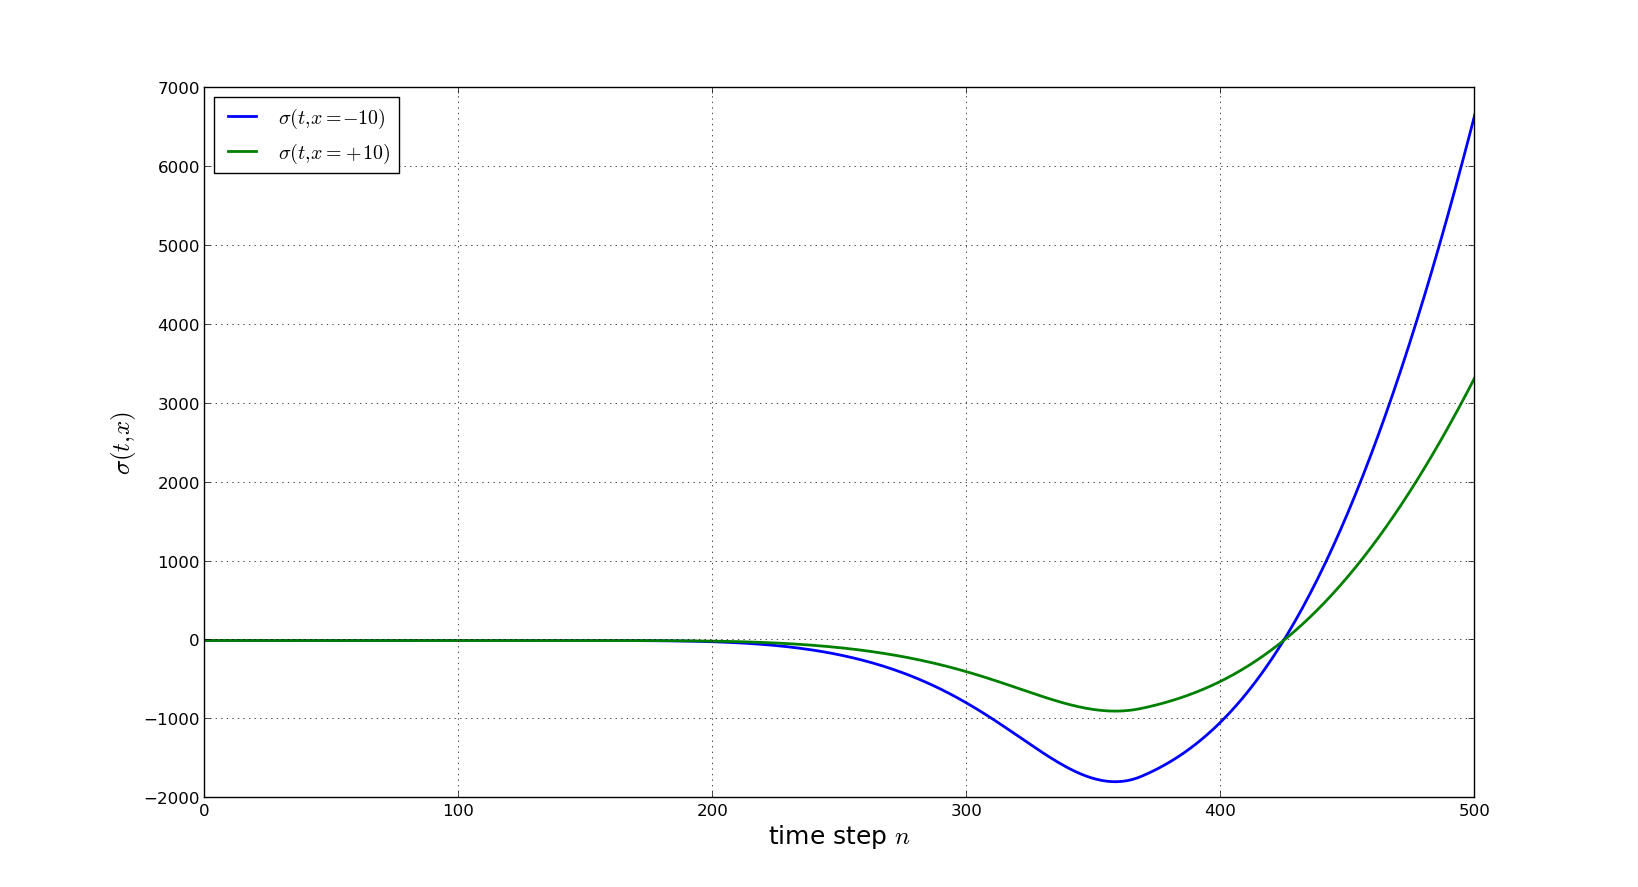

In [1]:
from IPython.display import Image
Image(filename='./fig/s18-07/charge_density.png')

## electron (see titles for times)

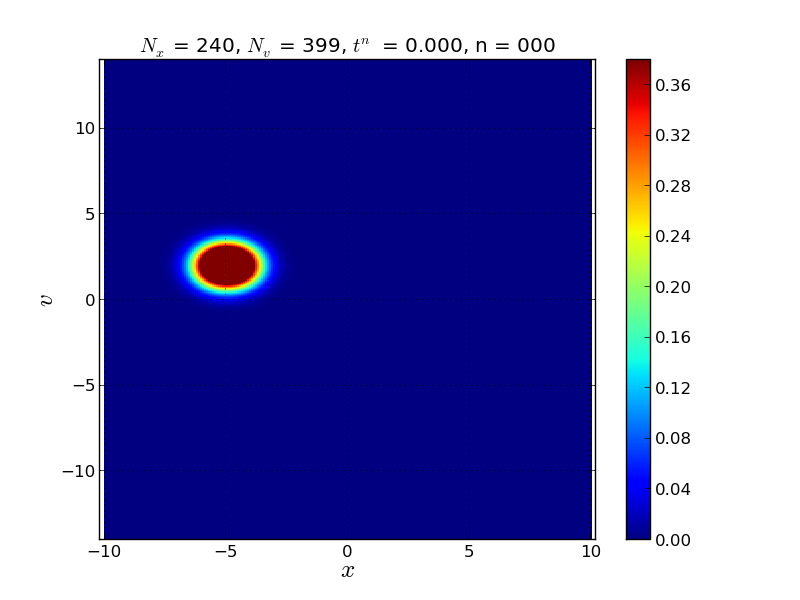

In [3]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00000.png')

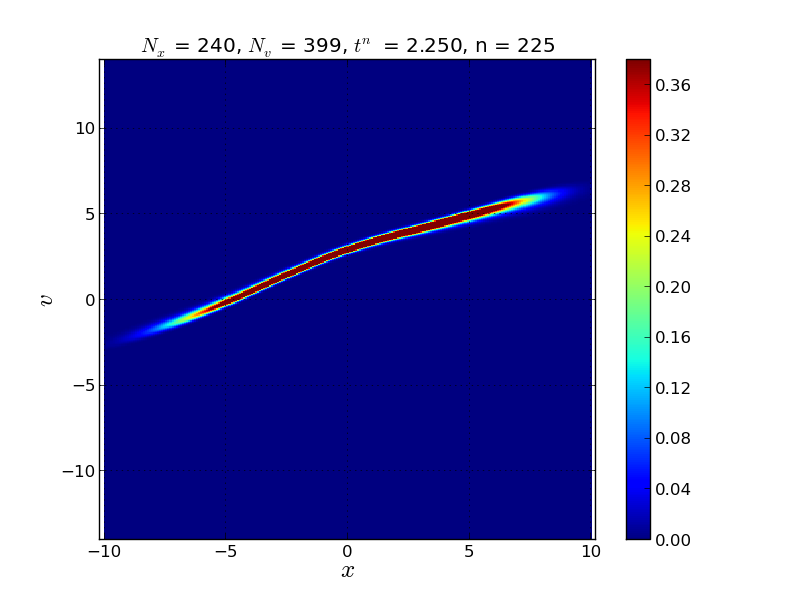

In [4]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00225.png')

Here, electrons begin to reach the right wall, charging it negative (see charge history plot)

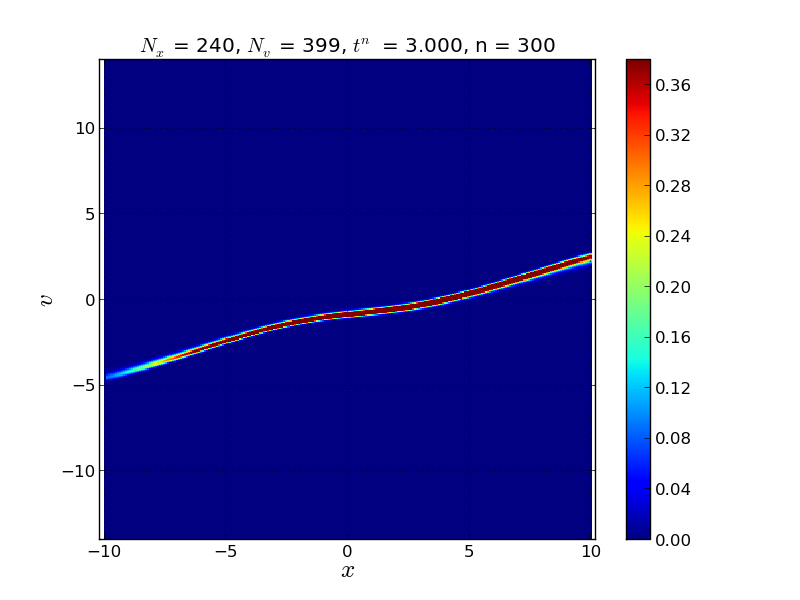

In [6]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00300.png')

The electrons reaching the wall accumulate their charge and repel and otherwise deccelerate incoming electrons, causing their velocities to decrease (density goes "down").

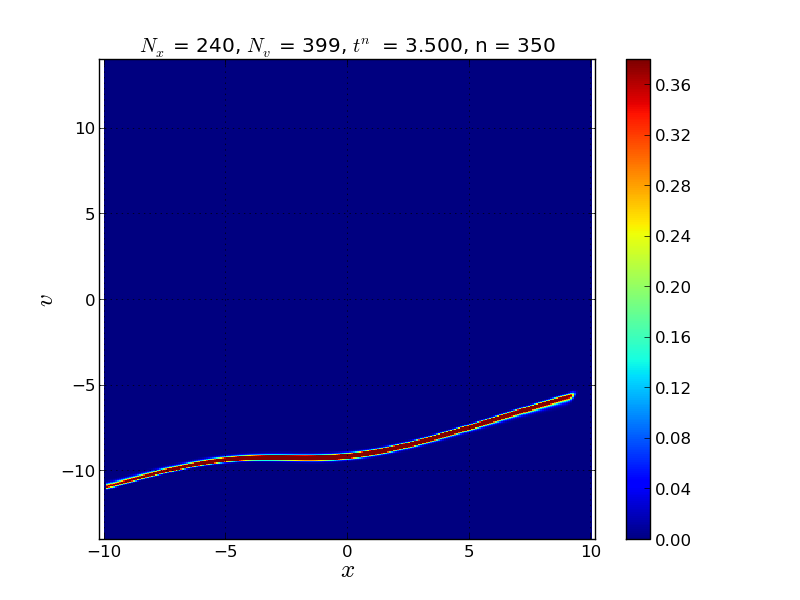

In [7]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00350.png')

the right wall reaches a negative peak around this time step, the wall pushes most electrons away sending their velocities negative. Further, the ion distribution overlaps with the electron distribution and stretch out leftward. This pulls the electrons left even more, causing their velocities to become even more negative.

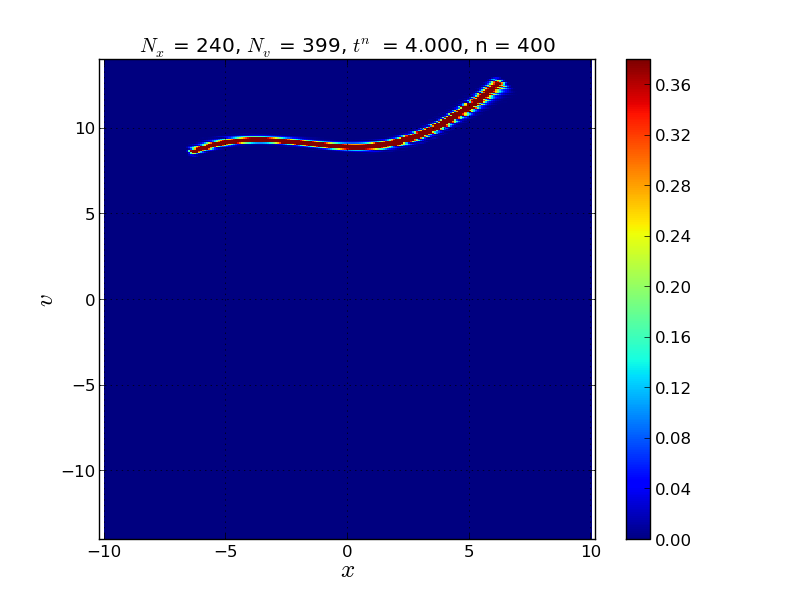

In [8]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00400.png')

The electrons get pushed so strongly left, their velocity exceeds the velocity domain. The electrons are periodically repeated on the top (i.e. equal but opposite signed velocity), which causes them to be suddenly enormously positive, hence they have enough energy to approach the right wall even if it were negatively charged. But at this time, see the charge history plot, enough ions have reached the wall that the wall on the right is positive and attractive. This increases the electron velocities, making them more positive until they exceed the domain again, then get periodically repeated with negative velocity of the same magnitude and head leftward and so on. Note, the periodic conditions on the velocity in this kind of case seems artificial. Periodic conditions are used because Fourier based corrections can be used, but the tacit need is that the significant populations of velocities should not exceed the domain (we need a negligible amount). Thus, we should have "absorber" conditions for the velocity which essentially indicate the particle exited our phase space being simulated.

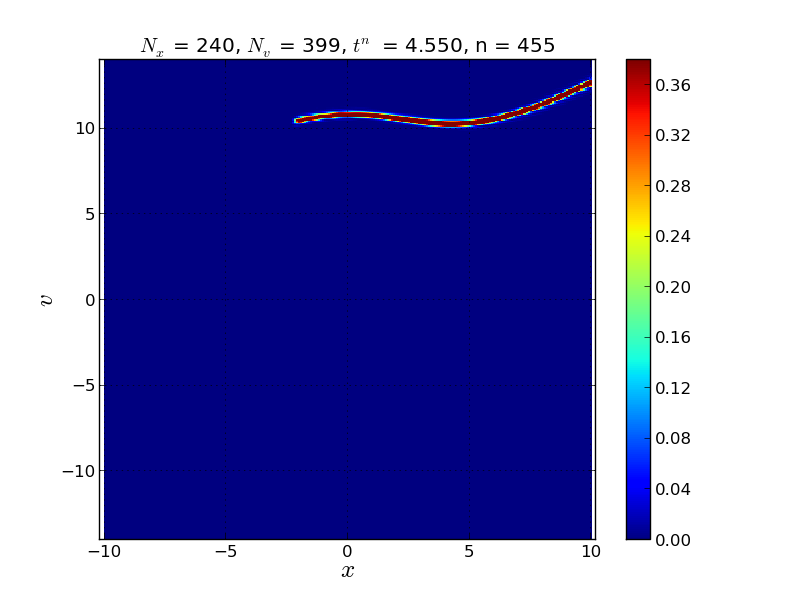

In [11]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00455.png')

## ions (see titles for times)

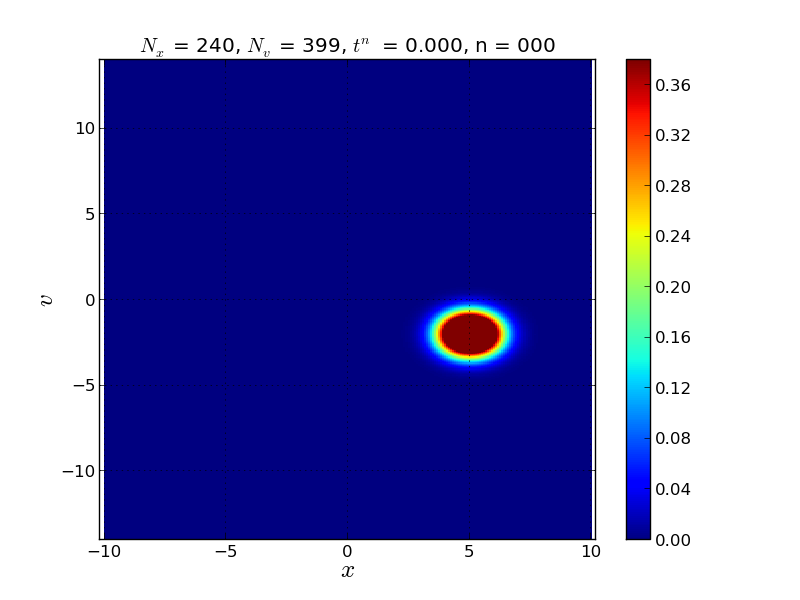

In [12]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00000.png')

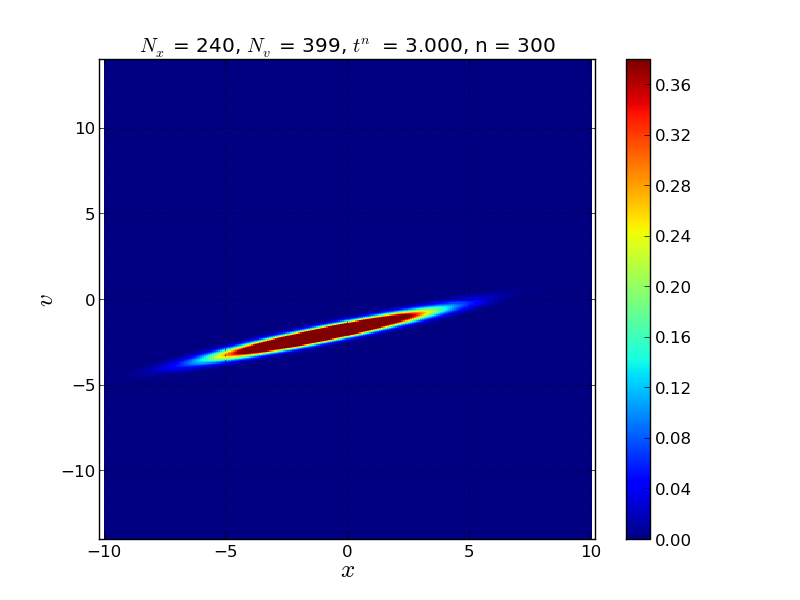

In [14]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00300.png')

The ions had initially mostly negative velocity (leftward), they travel left and increase in velocity negatively as they are attracted by the electron distribution. The smaller number which started with small negative velocities or small positive numbers head right. The electron distribution stretches over the whole domain with more near the right-edge, hence ions are accelerated to more positive velocities due to the electrons and the negative wall charge that initially occurs. Note that many of these ions that end up with positive velocity originally had negative velocity, hence they would not reach as largely positive values as those that are negative initially and which got accelerated negatively.

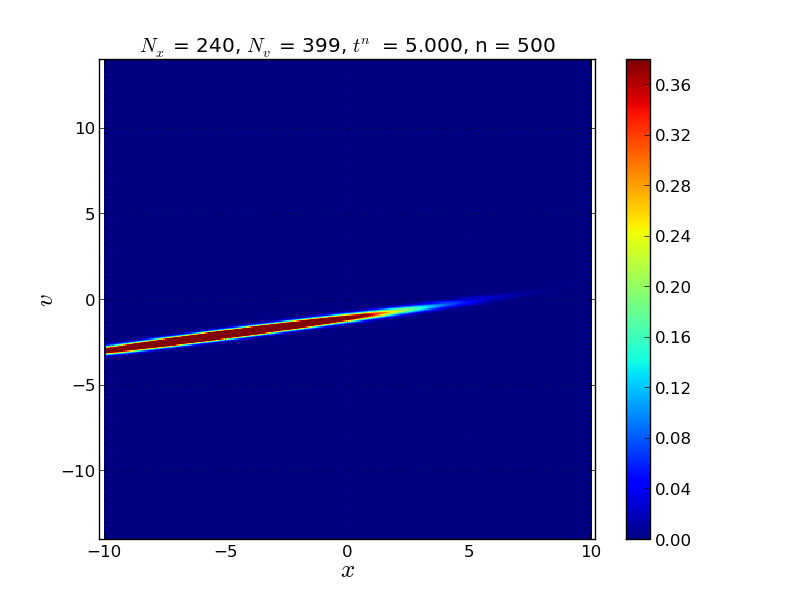

In [13]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00500.png')

ions hit both walls causing wall accumulation. We see on the left the density goes upward slightly due to the ion concentrations accumulating on the left wall and it repelling ions.

# Objective 4: numerical boundary condition (symmetry)

A numerical condition can be used to reduce the simulated domain in half provided there is symmetry that can be exploited. Suppose the situation is that there are two walls at a distance $x = \pm L$ from a center $x = 0$. The symmetry permits us to consider the numerical domain $x\in [0, L]$ rather than $x\in [-L, L]$. The symmetry boundary conditions needs to affect the equivalent particle fluxes incoming from the other half. That is, we consider what are often called "ghost" particles (this author prefers the more indicative name "partner particles"). If a particle in $(x,v_x)$ space exits the numerical domain at $x = 0$ with a velocity $v_x$, we acknowledge the symmetry means this outgoing particle in the domain $x\in [0,L]$ has a partner particle exiting its domain $x\in [-L, 0]$ at $x = 0$ but necessarily has oppositely directed velocity and constitutes a source term of incoming particles for the simulated domain $x\in [0, L]$, i.e. the fluxes at $x = 0$ are equal: 

$$(\Gamma^+_{\ell,(i,e)})(0) = (\Gamma^-_{r,(i,e)})(0), \qquad \qquad \text{symmetry boundary condition}$$

where $\ell$ and $r$ indicate domains on the left and right, respectively. That is, $x_{\ell}\in \mathcal{D}_{x,\ell} = [-L, 0]$ (unsimulated domain), $x_{r}\in \mathcal{D}_{x,r} = [0,L]$ (simulated domain), and

$$\Gamma^{\pm}_{i,e} = \Gamma^{\pm}_{i,e}(x) =  n_{(i,e)} v_{x,(i,e)}$$

Note, we use delimiters $()$ to indicate an ordered tuple, i.e. we either choose $i$ on both quantities or $e$ on both.

The effect of this boundary condition is to replace exiting particles from the simulated domain $\mathcal{D}_{x,r}$ with velocity $v_x$ advecting to a postpoint $x_k\in \mathcal{D}_{x,\ell}$ at its mirror image location in the simulated domain $\mathcal{D}_{x,\ell}$ equipped with oppositely oriented velocity $-v_x$.

<table>
<tr><td>Symmetry boundary condition implementation</td></tr>
<tr><td>
If a particle exits the simulated domain thereby entering the unsimulated domain but stays away from the edge (note in the simulated domain, the wall is at grid location $i = N_x - 1$, hence in the unsimulated domain the wall is at location $i = -(N_x - 1)$), then we replace the particle whose postpoint $k$ lies within the unsimulated domain, to its image location $-k$ which <i>is</i> in the simulated domain.
$${}$$
$$f_{i,e}(x_i, v_{x,j}) \mapsto x_k\colon k\in [-(N_x-2), -(Nx - 3), \ldots , 2, 1, 0) \qquad \text{then replace with } f_{i,e}(x_{-k}, -v_{x,j})$$
$${}$$
Else, if the particle exits the simulated domain, entering the unsimulated domain and its velocity is sufficient to push it to or beyond the wall ($i = -(N_x - 1)$) on the left-half , then apply the wall boundary condition (e.g. charge collection and perfect absorber).
$${}$$
$$f_{i,e}(x_i, v_{x,j}) \mapsto x_k\colon k\in\mathbb{Z}\colon k \leq -(N_x-1) \qquad \text{apply wall boundary condition at right wall with } v_{x,j} \rightarrow -v_{x,j}$$
</td></tr></table>

where $v_{x,j} < 0$ in the above implementation.